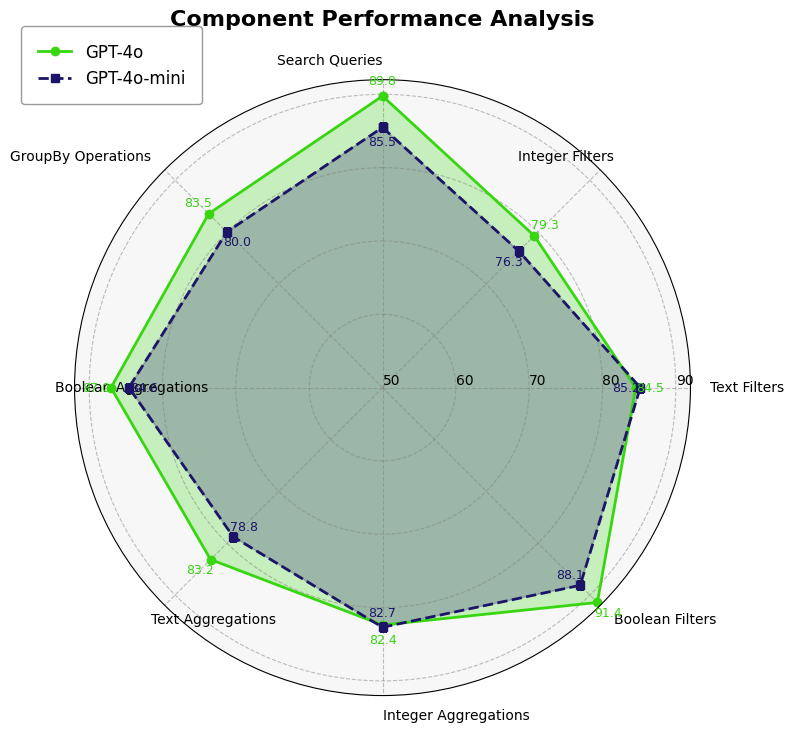

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
categories = ['Search Queries', 'Integer Filters', 'Text Filters', 
              'Boolean Filters', 'Integer Aggregations', 'Text Aggregations',
              'Boolean Aggregations', 'GroupBy Operations']
gpt4o_values = [89.77, 79.28, 84.53, 91.44, 82.38, 83.16, 87.03, 83.53]
gpt4o_mini_values = [85.48, 76.31, 85.16, 88.13, 82.69, 78.78, 84.59, 80.03]

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Complete the loop for plotting
gpt4o_values += gpt4o_values[:1]
gpt4o_mini_values += gpt4o_mini_values[:1]

# Set up the figure with white background
fig = plt.figure(figsize=(8, 8), facecolor='white')
ax = fig.add_subplot(111, projection='polar')
ax.set_facecolor('#f7f7f7')

# Set colors
gpt4o_color = '#38d611'        # Original color for GPT-4o
gpt4o_mini_color = '#1c1468'   # Original color for GPT-4o-mini

# Plot data with improved styles
ax.plot(angles, gpt4o_values, marker='o', linestyle='solid', linewidth=2, label='GPT-4o', color=gpt4o_color)
ax.fill(angles, gpt4o_values, alpha=0.25, color=gpt4o_color)
ax.plot(angles, gpt4o_mini_values, marker='s', linestyle='dashed', linewidth=2, label='GPT-4o-mini', color=gpt4o_mini_color)
ax.fill(angles, gpt4o_mini_values, alpha=0.25, color=gpt4o_mini_color)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Set the labels for each axis with adjusted rotation
ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10)
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    angle_deg = np.degrees(angle)
    if angle_deg >= 90 and angle_deg <= 270:
        label.set_horizontalalignment('left')
        label.set_rotation(angle_deg + 180)
    else:
        label.set_horizontalalignment('right')
        label.set_rotation(angle_deg)

# Set chart minimum and maximum radius
ax.set_ylim(50, 92)

# Add gridlines with improved aesthetics
ax.set_rgrids(range(50, 93, 10), angle=90)
ax.yaxis.grid(True, linestyle='--', color='grey', alpha=0.5)
ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.5)

# Add data labels
for i in range(num_vars):
    angle = angles[i]
    value = gpt4o_values[i]
    ax.text(angle, value + 2, f"{value:.1f}", color=gpt4o_color, fontsize=9, ha='center', va='center')
    
    value_mini = gpt4o_mini_values[i]
    ax.text(angle, value_mini - 2, f"{value_mini:.1f}", color=gpt4o_mini_color, fontsize=9, ha='center', va='center')

# Add legend in top left with improved style
ax.legend(loc='upper left', 
         bbox_to_anchor=(-0.1, 1.1),
         fontsize=12,
         frameon=True,
         edgecolor='grey',
         borderpad=1)

plt.title('Component Performance Analysis', pad=20, size=16, fontweight='bold')
plt.tight_layout()

# Save the plot with high DPI
plt.savefig('openai_component_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

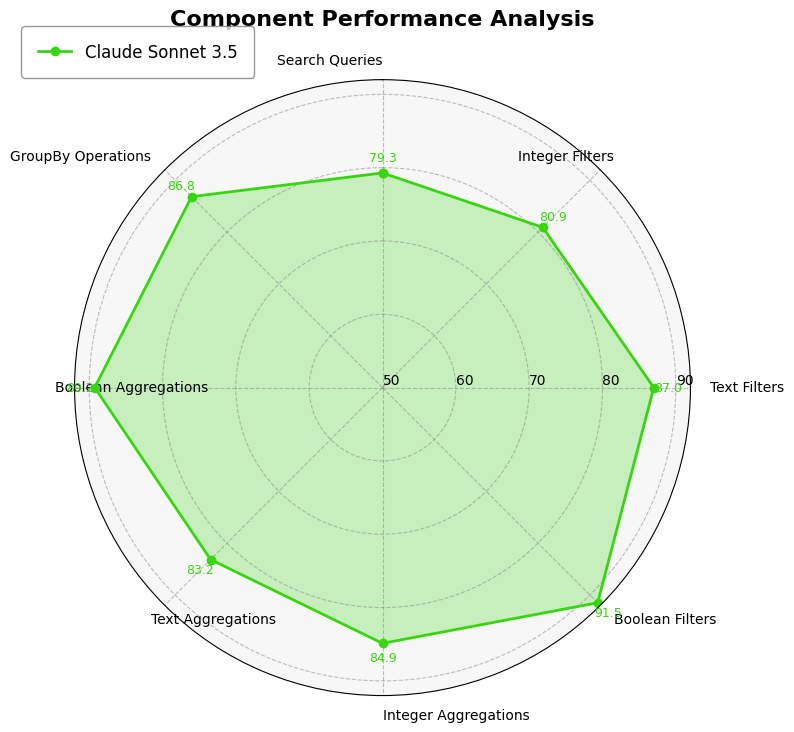

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
categories = ['Search Queries', 'Integer Filters', 'Text Filters', 
              'Boolean Filters', 'Integer Aggregations', 'Text Aggregations',
              'Boolean Aggregations', 'GroupBy Operations']
claude_sonnet_3_5_values = [79.28, 80.91, 87.0, 91.5, 84.88, 83.16, 89.25, 86.83]

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Complete the loop for plotting
claude_sonnet_3_5_values += claude_sonnet_3_5_values[:1]

# Set up the figure with white background
fig = plt.figure(figsize=(8, 8), facecolor='white')
ax = fig.add_subplot(111, projection='polar')
ax.set_facecolor('#f7f7f7')

# Set colors
anthropic_color = '#38d611'

# Plot data with improved styles
ax.plot(angles, claude_sonnet_3_5_values, marker='o', linestyle='solid', linewidth=2, label='Claude Sonnet 3.5', color=anthropic_color)
ax.fill(angles, claude_sonnet_3_5_values, alpha=0.25, color=anthropic_color)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Set the labels for each axis with adjusted rotation
ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10)
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    angle_deg = np.degrees(angle)
    if angle_deg >= 90 and angle_deg <= 270:
        label.set_horizontalalignment('left')
        label.set_rotation(angle_deg + 180)
    else:
        label.set_horizontalalignment('right')
        label.set_rotation(angle_deg)

# Set chart minimum and maximum radius
ax.set_ylim(50, 92)

# Add gridlines with improved aesthetics
ax.set_rgrids(range(50, 93, 10), angle=90)
ax.yaxis.grid(True, linestyle='--', color='grey', alpha=0.5)
ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.5)

# Add data labels
for i in range(num_vars):
    angle = angles[i]
    value = claude_sonnet_3_5_values[i]
    ax.text(angle, value + 2, f"{value:.1f}", color=anthropic_color, fontsize=9, ha='center', va='center')

# Add legend in top left with improved style
ax.legend(loc='upper left', 
         bbox_to_anchor=(-0.1, 1.1),
         fontsize=12,
         frameon=True,
         edgecolor='grey',
         borderpad=1)

plt.title('Component Performance Analysis', pad=20, size=16, fontweight='bold')
plt.tight_layout()

# Save the plot with high DPI
plt.savefig('anthropic_component_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

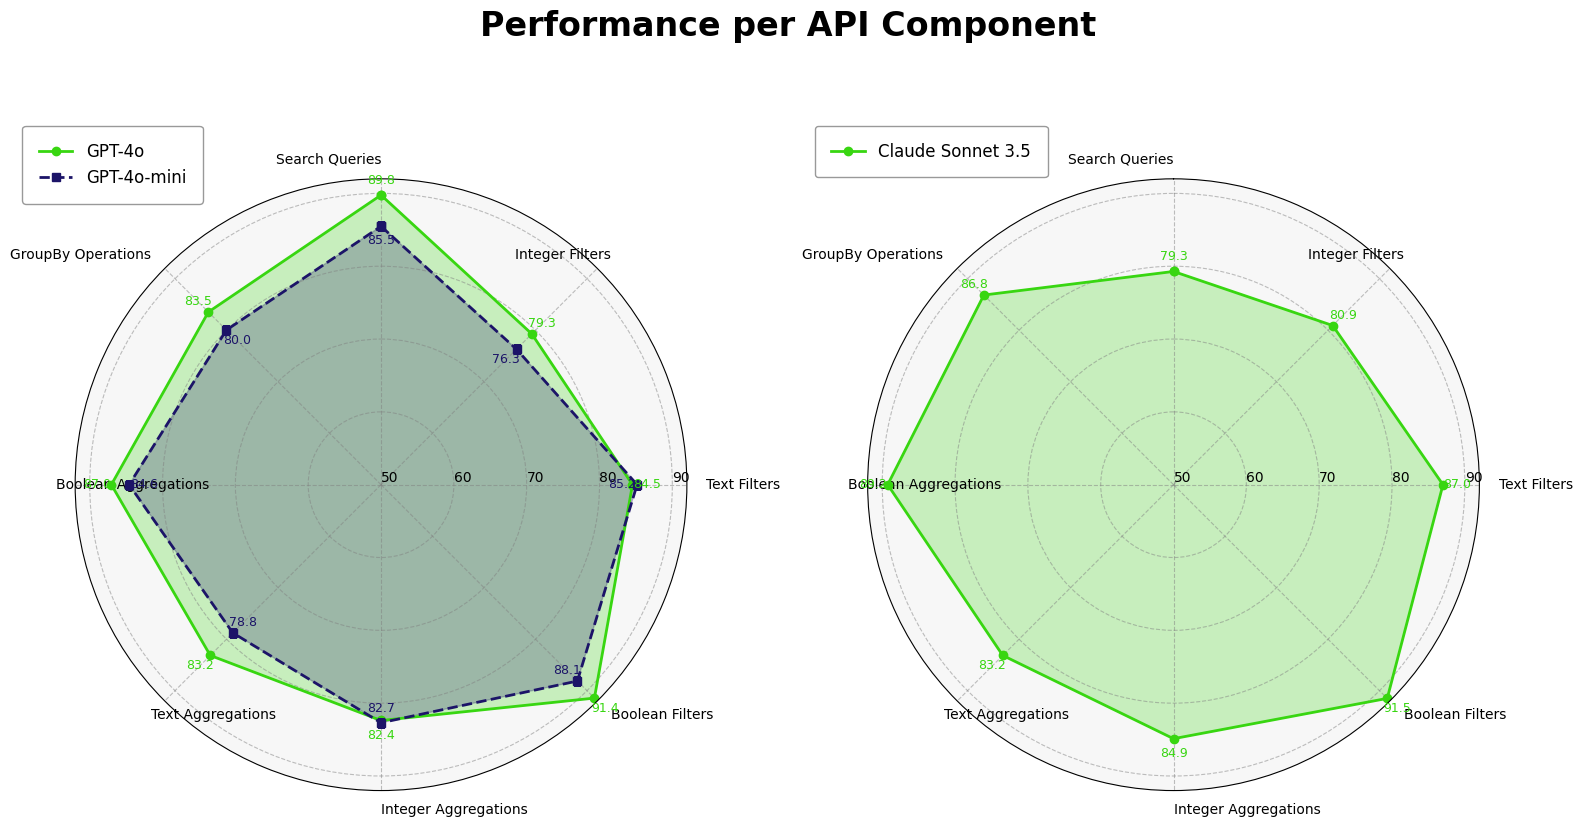

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': 'polar'}, facecolor='white')
fig.suptitle('Performance per API Component', size=24, fontweight='bold', y=1.05)

# Set background color for both plots
ax1.set_facecolor('#f7f7f7')
ax2.set_facecolor('#f7f7f7')

# Data preparation
categories = ['Search Queries', 'Integer Filters', 'Text Filters', 
              'Boolean Filters', 'Integer Aggregations', 'Text Aggregations',
              'Boolean Aggregations', 'GroupBy Operations']

# GPT-4o and GPT-4o-mini data
gpt4o_values = [89.77, 79.28, 84.53, 91.44, 82.38, 83.16, 87.03, 83.53]
gpt4o_mini_values = [85.48, 76.31, 85.16, 88.13, 82.69, 78.78, 84.59, 80.03]

# Claude data
claude_sonnet_3_5_values = [79.28, 80.91, 87.0, 91.5, 84.88, 83.16, 89.25, 86.83]

# Number of variables and angles
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Complete the loops for plotting
gpt4o_values += gpt4o_values[:1]
gpt4o_mini_values += gpt4o_mini_values[:1]
claude_sonnet_3_5_values += claude_sonnet_3_5_values[:1]

# Colors
gpt4o_color = '#38d611'
gpt4o_mini_color = '#1c1468'
anthropic_color = '#38d611'

# Left plot - GPT models
ax1.plot(angles, gpt4o_values, marker='o', linestyle='solid', linewidth=2, label='GPT-4o', color=gpt4o_color)
ax1.fill(angles, gpt4o_values, alpha=0.25, color=gpt4o_color)
ax1.plot(angles, gpt4o_mini_values, marker='s', linestyle='dashed', linewidth=2, label='GPT-4o-mini', color=gpt4o_mini_color)
ax1.fill(angles, gpt4o_mini_values, alpha=0.25, color=gpt4o_mini_color)

# Right plot - Claude model
ax2.plot(angles, claude_sonnet_3_5_values, marker='o', linestyle='solid', linewidth=2, label='Claude Sonnet 3.5', color=anthropic_color)
ax2.fill(angles, claude_sonnet_3_5_values, alpha=0.25, color=anthropic_color)

# Configure both plots
for ax in [ax1, ax2]:
    # Fix axis orientation
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Set labels
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10)
    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
        angle_deg = np.degrees(angle)
        if angle_deg >= 90 and angle_deg <= 270:
            label.set_horizontalalignment('left')
            label.set_rotation(angle_deg + 180)
        else:
            label.set_horizontalalignment('right')
            label.set_rotation(angle_deg)
    
    # Set chart limits and grid
    ax.set_ylim(50, 92)
    ax.set_rgrids(range(50, 93, 10), angle=90)
    ax.yaxis.grid(True, linestyle='--', color='grey', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.5)

# Add data labels for left plot
for i in range(num_vars):
    angle = angles[i]
    value = gpt4o_values[i]
    ax1.text(angle, value + 2, f"{value:.1f}", color=gpt4o_color, fontsize=9, ha='center', va='center')
    
    value_mini = gpt4o_mini_values[i]
    ax1.text(angle, value_mini - 2, f"{value_mini:.1f}", color=gpt4o_mini_color, fontsize=9, ha='center', va='center')

# Add data labels for right plot
for i in range(num_vars):
    angle = angles[i]
    value = claude_sonnet_3_5_values[i]
    ax2.text(angle, value + 2, f"{value:.1f}", color=anthropic_color, fontsize=9, ha='center', va='center')

# Add legends
ax1.legend(loc='upper left', bbox_to_anchor=(-0.1, 1.1), fontsize=12, frameon=True, edgecolor='grey', borderpad=1)
ax2.legend(loc='upper left', bbox_to_anchor=(-0.1, 1.1), fontsize=12, frameon=True, edgecolor='grey', borderpad=1)

plt.tight_layout()

# Save the plot with high DPI
plt.savefig('model_comparison_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


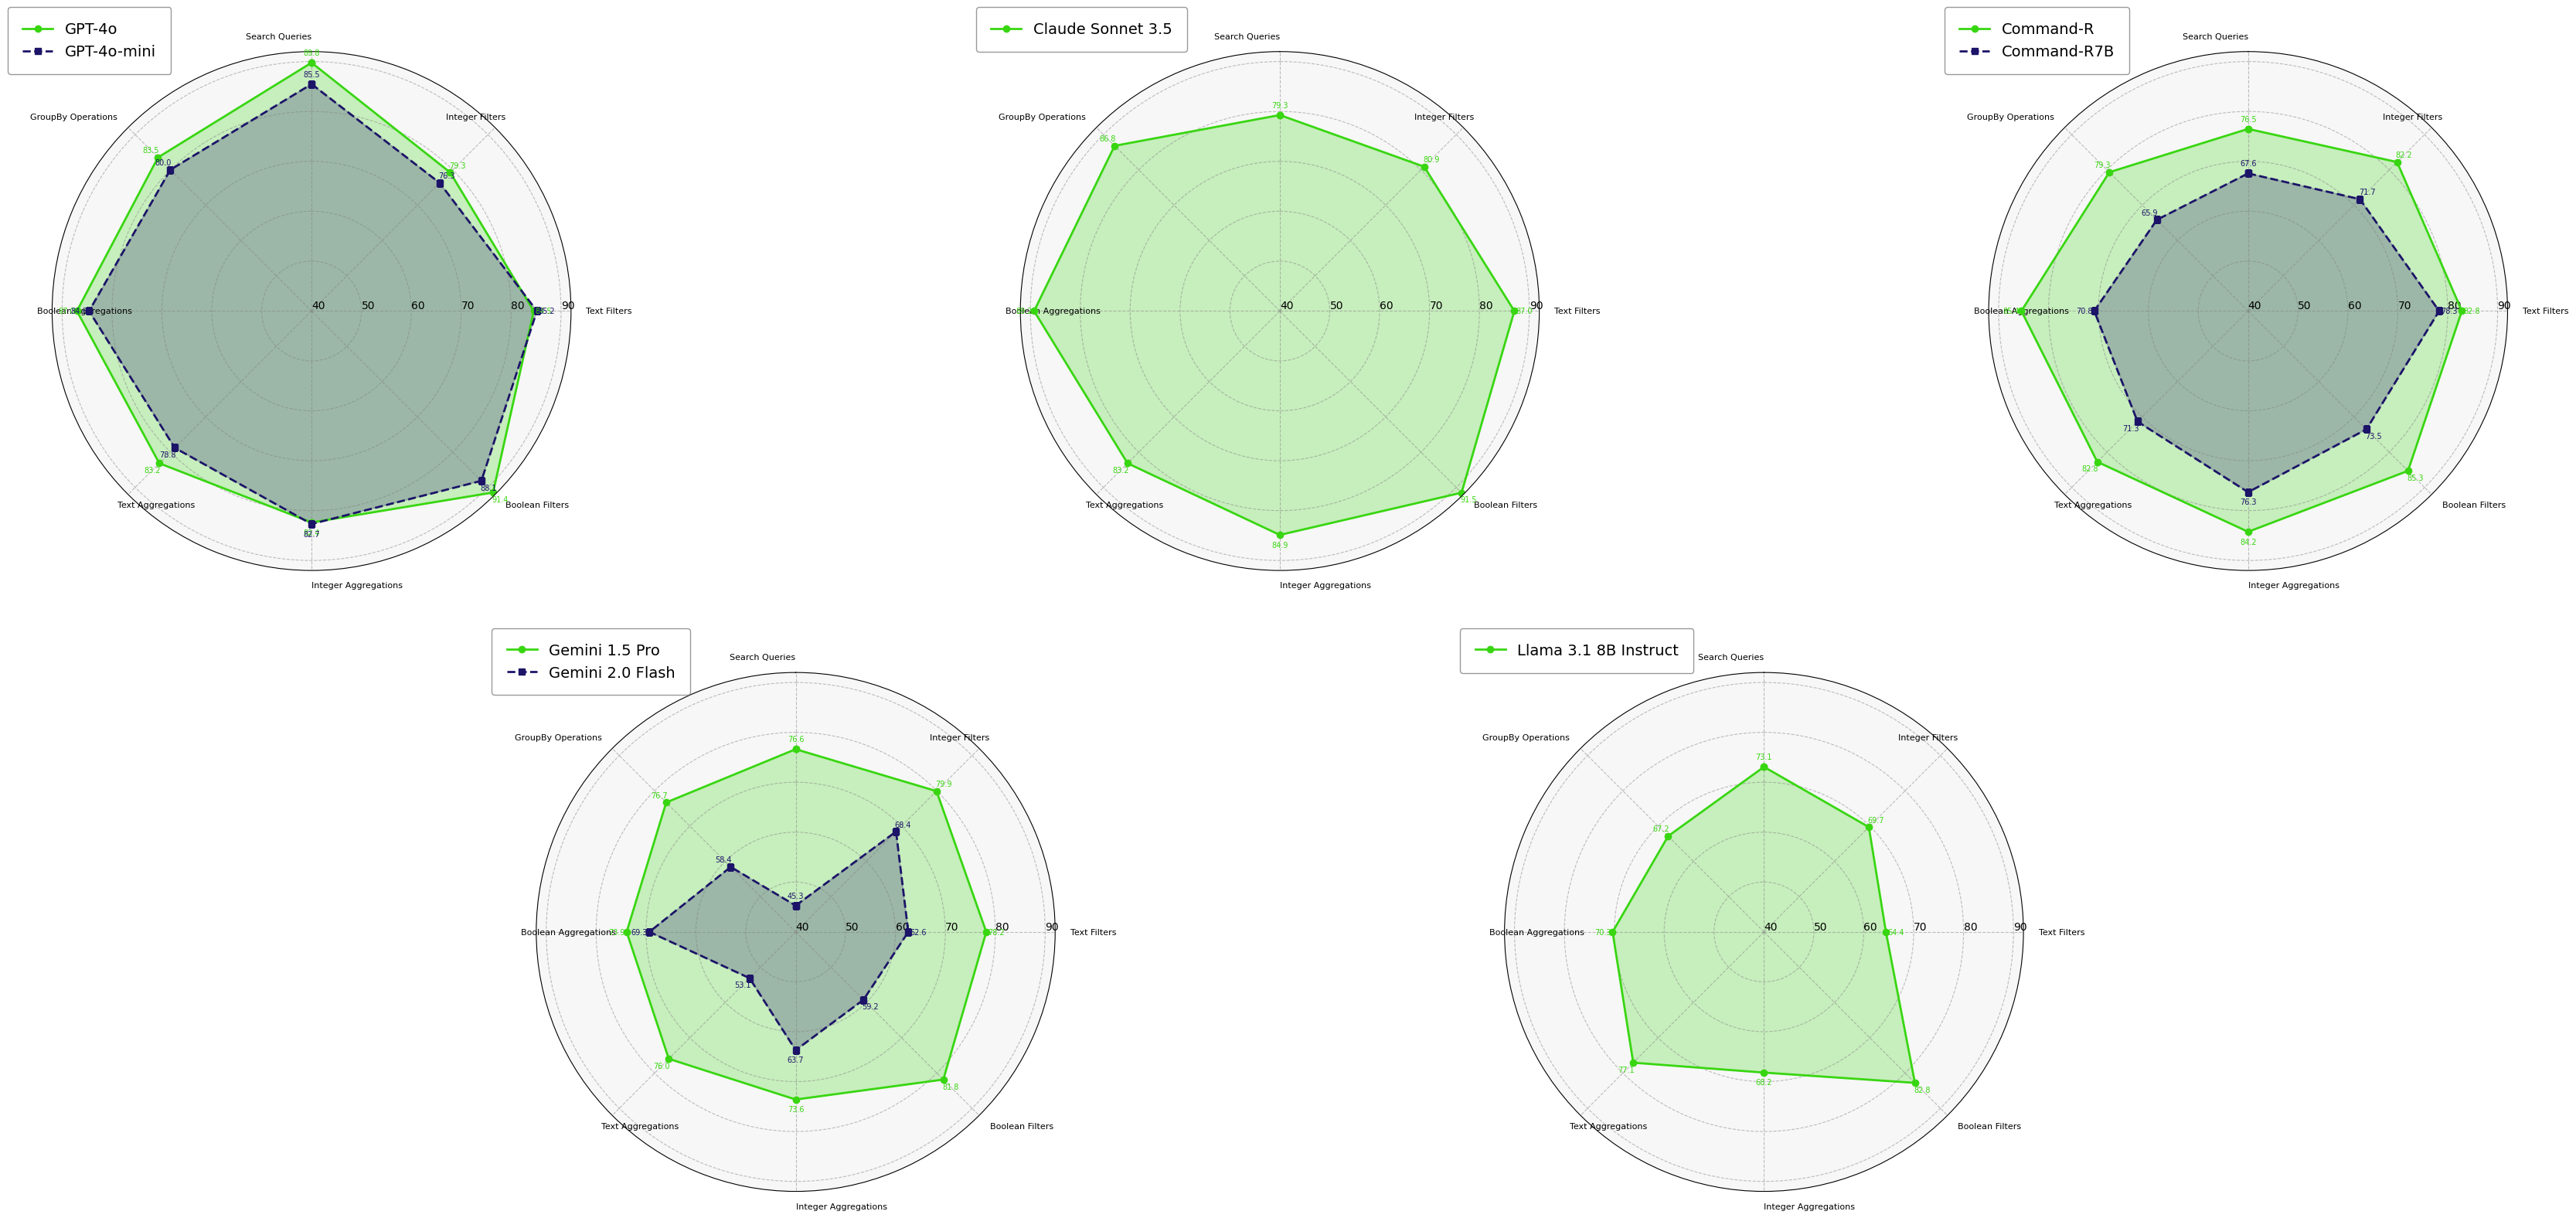

In [12]:
# Create a figure with five subplots arranged in 2 rows
fig = plt.figure(figsize=(40, 16), facecolor='white')
gs = fig.add_gridspec(2, 3, height_ratios=[1, 1])

# Create the 5 axes - 3 on top row, 2 on bottom row
ax1 = fig.add_subplot(gs[0, 0], projection='polar')
ax2 = fig.add_subplot(gs[0, 1], projection='polar') 
ax3 = fig.add_subplot(gs[0, 2], projection='polar')
ax4 = fig.add_subplot(gs[1, 0:2], projection='polar')
# Center the fifth plot between the second and third plots of first row
ax5 = fig.add_subplot(gs[1, 1:], projection='polar')

# Set background color for all plots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_facecolor('#f7f7f7')

# Data preparation
categories = ['Search Queries', 'Integer Filters', 'Text Filters', 
              'Boolean Filters', 'Integer Aggregations', 'Text Aggregations',
              'Boolean Aggregations', 'GroupBy Operations']

# Model data
gpt4o_values = [89.77, 79.28, 84.53, 91.44, 82.38, 83.16, 87.03, 83.53]
gpt4o_mini_values = [85.48, 76.31, 85.16, 88.13, 82.69, 78.78, 84.59, 80.03]
claude_sonnet_3_5_values = [79.28, 80.91, 87.0, 91.5, 84.88, 83.16, 89.25, 86.83]
command_r_values = [76.5, 82.22, 82.84, 85.31, 84.25, 82.75, 85.44, 79.34]
command_r7b_values = [67.58, 71.69, 78.28, 73.53, 76.31, 71.34, 70.84, 65.86]
gemini_1_5_pro_values = [76.62, 79.91, 78.19, 81.84, 73.59, 75.97, 73.88, 76.7]
gemini_2_flash_exp_values = [45.28, 68.44, 62.56, 59.22, 63.69, 53.09, 69.34, 58.42]
llama_3_1_8b_instruct_values = [73.08, 69.72, 64.44, 82.78, 68.19, 77.06, 70.34, 67.16]

# Number of variables and angles
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Complete the loops for plotting
gpt4o_values += gpt4o_values[:1]
gpt4o_mini_values += gpt4o_mini_values[:1]
claude_sonnet_3_5_values += claude_sonnet_3_5_values[:1]
command_r_values += command_r_values[:1]
command_r7b_values += command_r7b_values[:1]
gemini_1_5_pro_values += gemini_1_5_pro_values[:1]
gemini_2_flash_exp_values += gemini_2_flash_exp_values[:1]
llama_3_1_8b_instruct_values += llama_3_1_8b_instruct_values[:1]

# Colors
gpt4o_color = '#38d611'
gpt4o_mini_color = '#1c1468'

# Plot 1 - GPT models
ax1.plot(angles, gpt4o_values, marker='o', linestyle='solid', linewidth=2, label='GPT-4o', color=gpt4o_color)
ax1.fill(angles, gpt4o_values, alpha=0.25, color=gpt4o_color)
ax1.plot(angles, gpt4o_mini_values, marker='s', linestyle='dashed', linewidth=2, label='GPT-4o-mini', color=gpt4o_mini_color)
ax1.fill(angles, gpt4o_mini_values, alpha=0.25, color=gpt4o_mini_color)

# Plot 2 - Claude model
ax2.plot(angles, claude_sonnet_3_5_values, marker='o', linestyle='solid', linewidth=2, label='Claude Sonnet 3.5', color=gpt4o_color)
ax2.fill(angles, claude_sonnet_3_5_values, alpha=0.25, color=gpt4o_color)

# Plot 3 - Command models
ax3.plot(angles, command_r_values, marker='o', linestyle='solid', linewidth=2, label='Command-R', color=gpt4o_color)
ax3.fill(angles, command_r_values, alpha=0.25, color=gpt4o_color)
ax3.plot(angles, command_r7b_values, marker='s', linestyle='dashed', linewidth=2, label='Command-R7B', color=gpt4o_mini_color)
ax3.fill(angles, command_r7b_values, alpha=0.25, color=gpt4o_mini_color)

# Plot 4 - Gemini models
ax4.plot(angles, gemini_1_5_pro_values, marker='o', linestyle='solid', linewidth=2, label='Gemini 1.5 Pro', color=gpt4o_color)
ax4.fill(angles, gemini_1_5_pro_values, alpha=0.25, color=gpt4o_color)
ax4.plot(angles, gemini_2_flash_exp_values, marker='s', linestyle='dashed', linewidth=2, label='Gemini 2.0 Flash', color=gpt4o_mini_color)
ax4.fill(angles, gemini_2_flash_exp_values, alpha=0.25, color=gpt4o_mini_color)

# Plot 5 - Llama model
ax5.plot(angles, llama_3_1_8b_instruct_values, marker='o', linestyle='solid', linewidth=2, label='Llama 3.1 8B Instruct', color=gpt4o_color)
ax5.fill(angles, llama_3_1_8b_instruct_values, alpha=0.25, color=gpt4o_color)

# Configure all plots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    # Fix axis orientation
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Set labels
    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=8)
    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
        angle_deg = np.degrees(angle)
        if angle_deg >= 90 and angle_deg <= 270:
            label.set_horizontalalignment('left')
            label.set_rotation(angle_deg + 180)
        else:
            label.set_horizontalalignment('right')
            label.set_rotation(angle_deg)
    
    # Set chart limits and grid
    ax.set_ylim(40, 92)  # Extended lower limit to accommodate Gemini 2.0 Flash values
    ax.set_rgrids(range(40, 93, 10), angle=90)
    ax.yaxis.grid(True, linestyle='--', color='grey', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.5)

# Add data labels
def add_data_labels(ax, values, color):
    for i in range(num_vars):
        angle = angles[i]
        value = values[i]
        ax.text(angle, value + 2, f"{value:.1f}", color=color, fontsize=7, ha='center', va='center')

# Add data labels for each plot
add_data_labels(ax1, gpt4o_values, gpt4o_color)
add_data_labels(ax1, gpt4o_mini_values, gpt4o_mini_color)
add_data_labels(ax2, claude_sonnet_3_5_values, gpt4o_color)
add_data_labels(ax3, command_r_values, gpt4o_color)
add_data_labels(ax3, command_r7b_values, gpt4o_mini_color)
add_data_labels(ax4, gemini_1_5_pro_values, gpt4o_color)
add_data_labels(ax4, gemini_2_flash_exp_values, gpt4o_mini_color)
add_data_labels(ax5, llama_3_1_8b_instruct_values, gpt4o_color)

# Add legends with larger font size
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.legend(loc='upper left', bbox_to_anchor=(-0.1, 1.1), fontsize=14, frameon=True, edgecolor='grey', borderpad=1)

plt.tight_layout()

# Save the plot with high DPI
plt.savefig('model_comparison_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
